 # Import

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array,ImageDataGenerator
import tensorflow as tf

from sklearn.metrics import classification_report
import matplotlib.image as mpimg


# Load Data

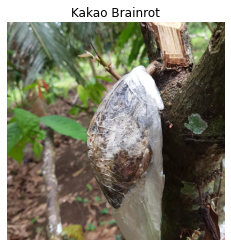

In [ ]:
img = load_img('path/.../...')
plt.imshow(img)
plt.axis('off')
plt.title('Kakao Brainrot');

2.1 ImageDataGenerator

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   horizontal_flip=True,
                                   height_shift_range=0.1,
                                   width_shift_range=0.1)

test_datagen  = ImageDataGenerator(rescale=1./255)

In [ ]:
## split to train and test
import splitfolders
splitfolders.ratio('path/.../...',
                   output = 'path/.../...',
                   seed = 1,
                   ratio = (0.8,0.2))

Copying files: 4390 files [00:55, 79.36 files/s] 


2.2 DataFlow

In [ ]:
## pretrained model yang akan kita pakai memiliki input size (224,224)
size = (224,224)

train_generator = train_datagen.flow_from_directory('path/.../.../dataset/KakaoSplit/train',
                                                    target_size=size,
                                                    batch_size=32,
                                                    shuffle=True,
                                                    class_mode='categorical')


test_generator  = test_datagen.flow_from_directory('path/.../.../dataset/KakaoSplit/val',
                                                    target_size=size,
                                                    batch_size=32,
                                                    shuffle=True,
                                                    class_mode='categorical')

Found 3511 images belonging to 3 classes.
Found 879 images belonging to 3 classes.


In [11]:
target_names = list(train_generator.class_indices.keys())

In [12]:
print(target_names)

['black_pod_rot', 'healthy', 'pod_borer']


In [ ]:
# import os
# kategori = os.listdir('W:/College1/SMT 7/MODEL/dataset/KakaoSplit/train/')
# value    = [len(os.listdir('W:/College1/SMT 7/MODEL/dataset/KakaoSplit/train/' + folder)) for folder in kategori]

# fig, ax = plt.subplots(nrows=3, ncols=3,figsize = (16,24))

# i = 0
# for j in range(4):
#   for k in range(3):
#     path = "W:/College1/SMT 7/MODEL/dataset/KakaoSplit/train/" + kategori[i]
#     list_gambar = os.listdir(path)

#     indeks = np.random.randint(value[i])

#     img = mpimg.imread(path + "/" + list_gambar[indeks])
#     ax[j,k].imshow(img)
#     ax[j,k].set_title(kategori[i])
#     ax[j,k].axis('off')

#     i += 1

# 3. Build Model

In [41]:
from tensorflow.keras.applications import MobileNetV2
import tensorflow_hub as hub
from tensorflow.keras.layers import Input
from tensorflow import keras


In [42]:
pre_trained_model = MobileNetV2(weights="imagenet", include_top=False,
                                input_tensor=Input(shape=(224, 224, 3)))

for layer in pre_trained_model.layers:
    layer.trainable = False

last_output = pre_trained_model.output


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10084\4168559421.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  pre_trained_model = MobileNetV2(weights="imagenet", include_top=False,


In [80]:
model = tf.keras.Sequential([
    pre_trained_model,
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # tf.keras.layers.Dropout(0,5, seed = 112),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
  ])

In [81]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [82]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=2e-4),
              metrics=['accuracy'])
# model.build([None,224, 224, 3])

In [57]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [83]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

# Training

In [59]:
import time

In [84]:
start_time = time.time()

trained_model = model.fit(train_generator,
                          epochs=15,
                          validation_data = test_generator )


end_time   = time.time()
duration   = np.round((end_time - start_time)/60,2)
print("\nTime Elapsed for training model : ",duration,"minutes.")

Epoch 1/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 234s 2s/step - accuracy: 0.7459 - loss: 0.8139 - val_accuracy: 0.8498 - val_loss: 0.4301
Epoch 2/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 227s 2s/step - accuracy: 0.8657 - loss: 0.3554 - val_accuracy: 0.8987 - val_loss: 0.2814
Epoch 3/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step - accuracy: 0.8941 - loss: 0.2813 - val_accuracy: 0.8965 - val_loss: 0.3077
Epoch 4/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.8946 - loss: 0.2837 - val_accuracy: 0.8862 - val_loss: 0.3434
Epoch 5/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.9113 - loss: 0.2440 - val_accuracy: 0.8692 - val_loss: 0.3379
Epoch 6/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 198s 2s/step - accuracy: 0.9144 - loss: 0.2303 - val_accuracy: 0.8578 - val_loss: 0.4125
Epoch 7/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.9126 - loss: 0.2247 - val_accuracy: 0.8965 - val_loss: 0.2808
Epoch 8/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.9305 - loss: 0.1925 - val_accu

# Model Performance

5.1 Accuracy & Loss

In [102]:
print("Model Performance on Data Train")
loss, acc = model.evaluate(train_generator)
print(f"Loss     : {np.round(loss, 2)}")
print(f"Accuracy : {np.round(acc, 2)}")

print("\nModel Performance on Data Testing")
loss, acc = model.evaluate(test_generator)
print(f"Loss     : {np.round(loss, 2)}")
print(f"Accuracy : {np.round(acc, 2)}")

Model Performance on Data Train
110/110 ━━━━━━━━━━━━━━━━━━━━ 180s 2s/step - accuracy: 0.9502 - loss: 0.1320
Loss     : 0.13
Accuracy : 0.95

Model Performance on Data Testing
28/28 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.9203 - loss: 0.2280
Loss     : 0.25
Accuracy : 0.92


In [96]:
from sklearn.metrics import classification_report

y_pred = model.predict(test_generator, steps=len(test_generator))

28/28 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step


In [101]:
print(classification_report(test_generator.classes, y_pred))

              precision    recall  f1-score   support

           0       0.21      0.19      0.20       189
           1       0.76      0.79      0.77       669
           2       0.07      0.05      0.06        21

    accuracy                           0.64       879
   macro avg       0.35      0.34      0.34       879
weighted avg       0.63      0.64      0.63       879



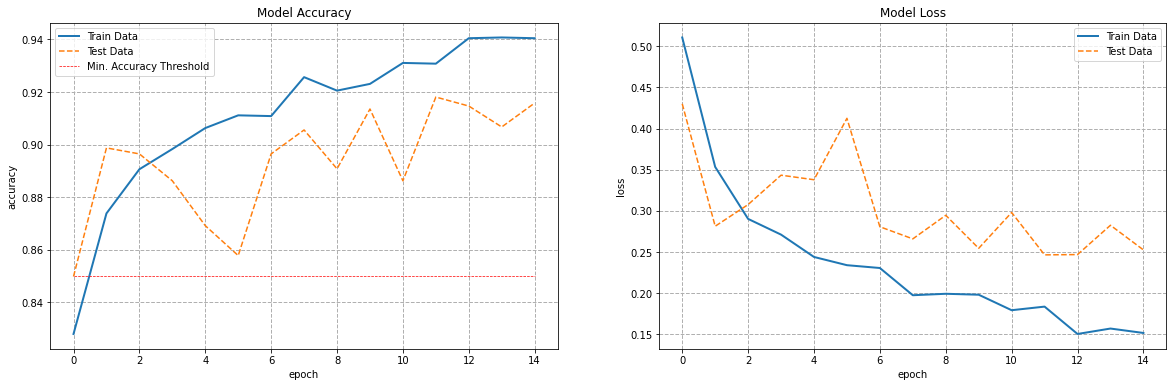

In [103]:
def plot_trained_model_history(trained_model,min_acc):
    acc     = trained_model.history['accuracy']
    val_acc = trained_model.history['val_accuracy']

    loss     = trained_model.history['loss']
    val_loss = trained_model.history['val_loss']

    plt.figure(figsize=(20, 6))

    length   = len(acc)
    min_acc  = [min_acc]*length

    # Grafik Nilai Akurasi
    plt.subplot(1, 2, 1)
    plt.title('Model Accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.plot(acc, label='Train Data',linewidth=2)
    plt.plot(val_acc, label='Test Data', linestyle='--')
    plt.plot(min_acc, label='Min. Accuracy Threshold',linestyle='--',color='red',linewidth=.7)
    plt.legend()
    plt.grid(linestyle='--', linewidth=1)

    # Grafik Nilai Loss
    plt.subplot(1, 2, 2)
    plt.title('Model Loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(loss, label='Train Data',linewidth=2)
    plt.plot(val_loss, label='Test Data', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1)

    plt.show()

plot_trained_model_history(trained_model,0.85)

backtesting

In [ ]:
import matplotlib.pyplot as plt

feature,target = next(iter(test_generator))
y_pred = new_model.predict(test_generator)
y_pred

fig,axes = plt.subplots(8,4,figsize=(24,32))
for img,label,pred,ax in zip(feature,target,y_pred,axes.flatten()):
    ax.imshow(img)
    label = label.argmax()
    pred  = pred.argmax()

    font = {"color":"g"} if label == pred else {"color":"r"}

    label_name,pred_name = target_names[label], target_names[pred]

    ax.set_title(f"Label : {label_name} | Pred : {pred_name}", fontdict=font)
    ax.axis("off");

In [67]:
## save model
model.save('kakao_mobilenet_v2.h5')

In [69]:
## load the model
from tensorflow.keras.models import load_model

new_model = tf.keras.models.load_model(('kakao_mobilenet_v2.h5'),
                                       custom_objects={'KerasLayer':hub.KerasLayer})

28/28 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step


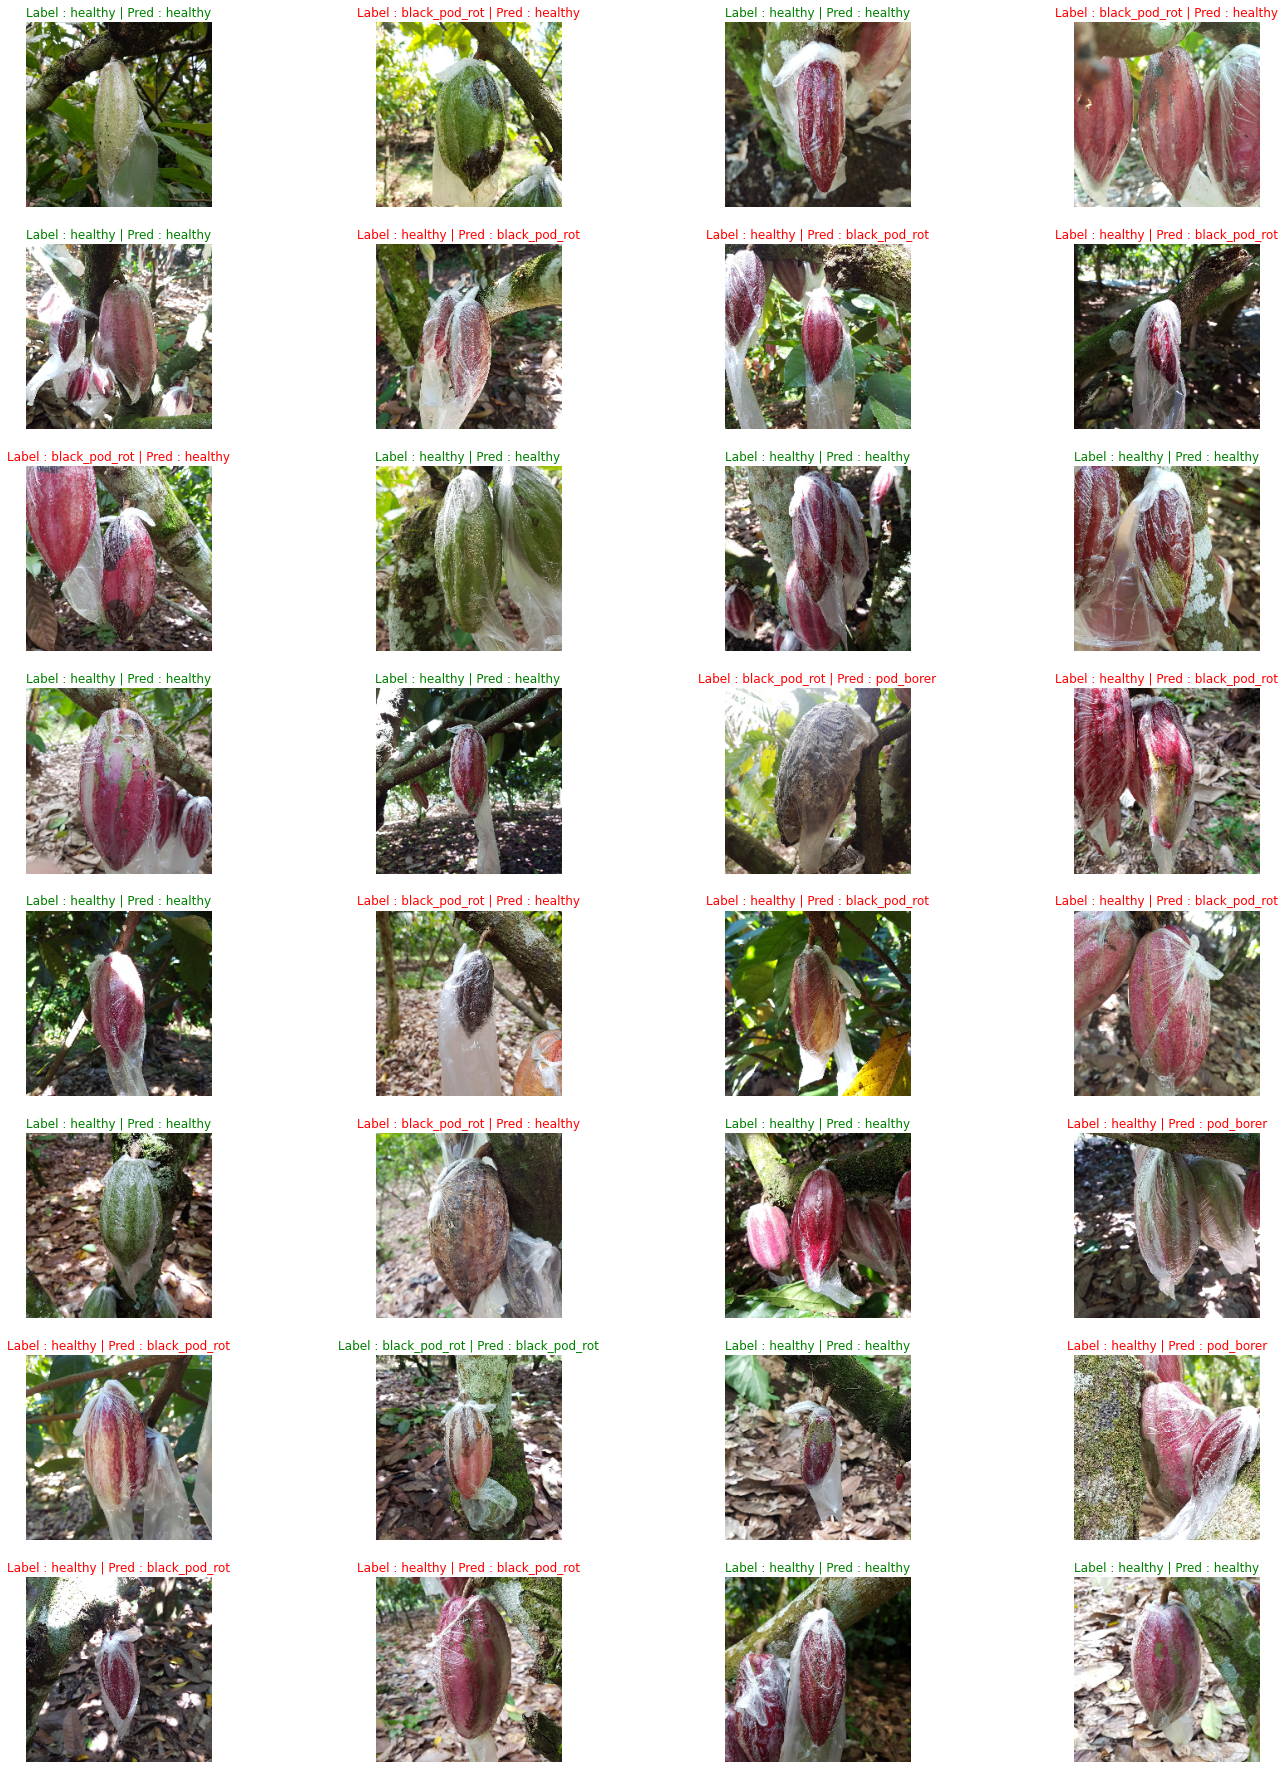

In [70]:
import matplotlib.pyplot as plt

feature,target = next(iter(test_generator))
y_pred = new_model.predict(test_generator)
y_pred

fig,axes = plt.subplots(8,4,figsize=(24,32))
for img,label,pred,ax in zip(feature,target,y_pred,axes.flatten()):
    ax.imshow(img)
    label = label.argmax()
    pred  = pred.argmax()

    font = {"color":"g"} if label == pred else {"color":"r"}

    label_name,pred_name = target_names[label], target_names[pred]

    ax.set_title(f"Label : {label_name} | Pred : {pred_name}", fontdict=font)
    ax.axis("off");